# Decompose the Ask

**Task:** Collect and analyze weather data across cities worldwide.

 **Purpose:** Use the data to recommend ideal hotels based on clients’ weather and latitude/longitude preferences.

# Identify the Data Sources

# Data Retrieval


In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b396ffd8037184849afd69cd267c0d1


In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-63.3805849207849, -126.4224064348513), (-0.937763017114392, 25.235543353581306), (18.413985310819072, -115.99309987320508), (79.66185106940517, 173.52239073764213), (64.41886024095896, -19.270964906667217), (-6.9732541724848005, -127.08314747593788), (40.719832880043526, 123.63883587386937), (-41.99266357344527, 66.33977778433317), (-88.61765880387122, -133.9192401230283), (-62.7532694792158, 1.7757560232470553), (-84.42613042926533, 1.0741907685566616), (-51.14184333006079, -82.64945127831588), (-14.6700119638719, -57.205221737565765), (76.36155598195899, -8.104401011212076), (-32.22656273666547, 14.811286882848748), (-18.027520974630875, -73.84266266395569), (23.959732222367208, 7.87409097770157), (20.5946922038126, -91.46965999356667), (-49.90288036725418, 131.67652231843186), (-32.79621517482932, -94.07385915913494), (-5.8611797330811015, -22.718382871131382), (-64.72406131437418, 23.91084436563534), (-56.801526478157484, -13.621220718715279), (66.69034883344125, 0.0155577603127

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kisangani
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | hvolsvollur
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | fengcheng
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | nova olimpia
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | camana
Processing Record 15 of Set 1 | gat
Processing Record 16 of Set 1 | celestun
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | brae
Processing Record 23 of Set 1 | ne

Processing Record 40 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 4 | hwange
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | vestmanna
Processing Record 44 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | shuyskoye
Processing Record 49 of Set 4 | zhigansk
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | hambantota
Processing Record 2 of Set 5 | qaqortoq
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | vestbygda
City not found. Skipping...
Processing Record 5 of Set 5 | hollister
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | sidi ali
Processing Record 9 of Set 5 | krasnoselkup
Processing Record 10 of Set 5 | ubatuba
Processing Record 11 of Set 5 | fort

Processing Record 28 of Set 8 | tanda
Processing Record 29 of Set 8 | port-gentil
Processing Record 30 of Set 8 | sioux lookout
Processing Record 31 of Set 8 | collie
Processing Record 32 of Set 8 | san joaquin
Processing Record 33 of Set 8 | ouallam
Processing Record 34 of Set 8 | hobyo
Processing Record 35 of Set 8 | lyantonde
Processing Record 36 of Set 8 | eureka
Processing Record 37 of Set 8 | dinsor
City not found. Skipping...
Processing Record 38 of Set 8 | uige
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | college
Processing Record 41 of Set 8 | haines junction
Processing Record 42 of Set 8 | binghamton
Processing Record 43 of Set 8 | lazaro cardenas
Processing Record 44 of Set 8 | hornepayne
Processing Record 45 of Set 8 | pakdasht
Processing Record 46 of Set 8 | saint-augustin
Processing Record 47 of Set 8 | guanica
Processing Record 48 of Set 8 | saryozek
Processing Record 49 of Set 8 | atambua
Processing Record 50 of Set 8 | agadez
Processing Record

Processing Record 15 of Set 12 | chalons-en-champagne
Processing Record 16 of Set 12 | bereda
Processing Record 17 of Set 12 | biggar
Processing Record 18 of Set 12 | tual
Processing Record 19 of Set 12 | mahuta
Processing Record 20 of Set 12 | hohhot
Processing Record 21 of Set 12 | maldonado
Processing Record 22 of Set 12 | vilhena
Processing Record 23 of Set 12 | san jeronimo
Processing Record 24 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 25 of Set 12 | gaurnadi
Processing Record 26 of Set 12 | qena
Processing Record 27 of Set 12 | mehamn
Processing Record 28 of Set 12 | sangar
Processing Record 29 of Set 12 | waipawa
Processing Record 30 of Set 12 | borskoye
Processing Record 31 of Set 12 | praia da vitoria
Processing Record 32 of Set 12 | inhambane
Processing Record 33 of Set 12 | rancharia
Processing Record 34 of Set 12 | tabou
Processing Record 35 of Set 12 | yefira
City not found. Skipping...
Processing Record 36 of Set 12 | gympie
Processing Record 3

In [10]:
len(city_data)

556

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,78.80,79,5,15.10,PF,2020-02-19 17:45:05
1,Kisangani,0.52,25.20,75.31,84,28,0.27,CD,2020-02-19 17:45:51
2,Cabo San Lucas,22.89,-109.91,82.99,56,5,4.70,MX,2020-02-19 17:42:48
3,Pevek,69.70,170.31,-21.59,99,100,6.42,RU,2020-02-19 17:45:52
4,Hvolsvollur,63.75,-20.22,35.60,80,75,18.34,IS,2020-02-19 17:45:52
5,Atuona,-9.80,-139.03,81.50,79,66,19.30,PF,2020-02-19 17:45:52
6,Fengcheng,40.45,124.07,21.67,89,0,3.71,CN,2020-02-19 17:45:53
7,Saint-Philippe,-21.36,55.77,78.80,69,14,16.11,RE,2020-02-19 17:45:53
8,Hermanus,-34.42,19.23,71.01,73,0,1.99,ZA,2020-02-19 17:45:53
9,Punta Arenas,-53.15,-70.92,55.40,57,40,29.97,CL,2020-02-19 17:45:53


In [12]:
# Reordering the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-02-19 17:45:05,-23.12,-134.97,78.80,79,5,15.10
1,Kisangani,CD,2020-02-19 17:45:51,0.52,25.20,75.31,84,28,0.27
2,Cabo San Lucas,MX,2020-02-19 17:42:48,22.89,-109.91,82.99,56,5,4.70
3,Pevek,RU,2020-02-19 17:45:52,69.70,170.31,-21.59,99,100,6.42
4,Hvolsvollur,IS,2020-02-19 17:45:52,63.75,-20.22,35.60,80,75,18.34
5,Atuona,PF,2020-02-19 17:45:52,-9.80,-139.03,81.50,79,66,19.30
6,Fengcheng,CN,2020-02-19 17:45:53,40.45,124.07,21.67,89,0,3.71
7,Saint-Philippe,RE,2020-02-19 17:45:53,-21.36,55.77,78.80,69,14,16.11
8,Hermanus,ZA,2020-02-19 17:45:53,-34.42,19.23,71.01,73,0,1.99
9,Punta Arenas,CL,2020-02-19 17:45:53,-53.15,-70.92,55.40,57,40,29.97


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Assemble and Clean


In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582134500.627153

In [31]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Analyze for Trends


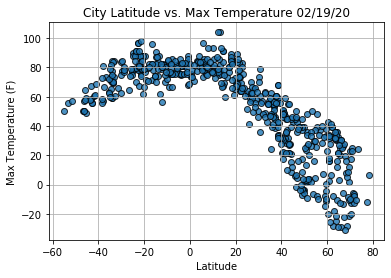

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

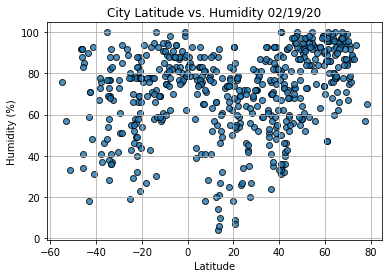

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

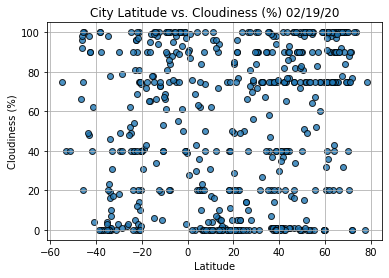

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

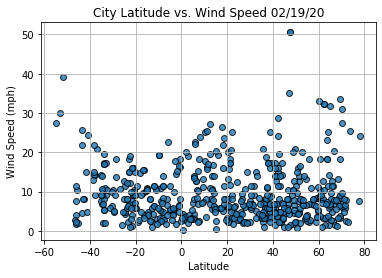

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
# present all the information at index 13 of the city_data_df DataFrame.
index13 = city_data_df.loc[13]
index13

City                       Camana
Country                        PE
Date          2020-02-19 17:41:30
Lat                        -16.62
Lng                        -72.71
Max Temp                    71.22
Humidity                       78
Cloudiness                     95
Wind Speed                   9.66
Name: 13, dtype: object

In [38]:
# get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0 
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-02-19 17:45:05,-23.12,-134.97,78.80,79,5,15.10
1,Kisangani,CD,2020-02-19 17:45:51,0.52,25.20,75.31,84,28,0.27
2,Cabo San Lucas,MX,2020-02-19 17:42:48,22.89,-109.91,82.99,56,5,4.70
3,Pevek,RU,2020-02-19 17:45:52,69.70,170.31,-21.59,99,100,6.42
4,Hvolsvollur,IS,2020-02-19 17:45:52,63.75,-20.22,35.60,80,75,18.34
5,Atuona,PF,2020-02-19 17:45:52,-9.80,-139.03,81.50,79,66,19.30
6,Fengcheng,CN,2020-02-19 17:45:53,40.45,124.07,21.67,89,0,3.71
7,Saint-Philippe,RE,2020-02-19 17:45:53,-21.36,55.77,78.80,69,14,16.11
8,Hermanus,ZA,2020-02-19 17:45:53,-34.42,19.23,71.01,73,0,1.99
9,Punta Arenas,CL,2020-02-19 17:45:53,-53.15,-70.92,55.40,57,40,29.97


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

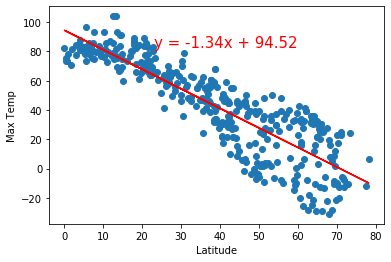

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(23,83))

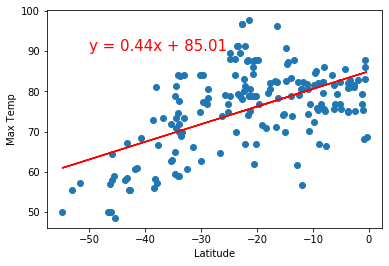

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

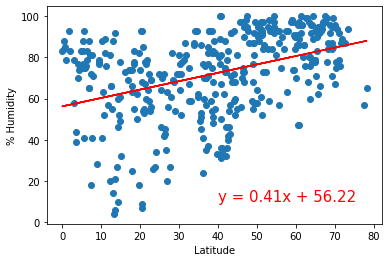

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

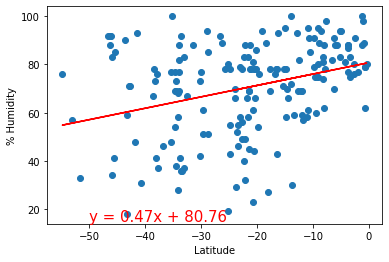

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

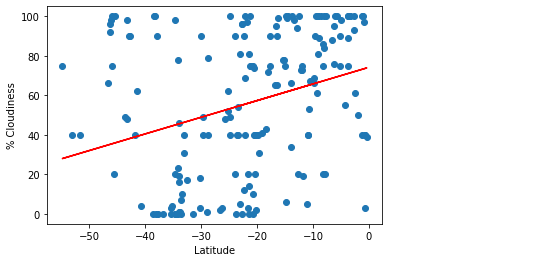

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(5,83))

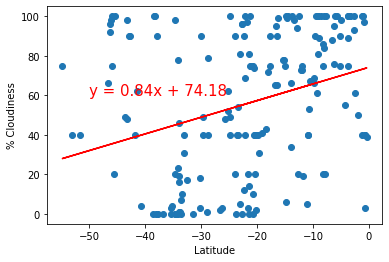

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

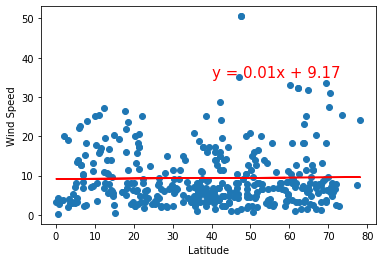

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

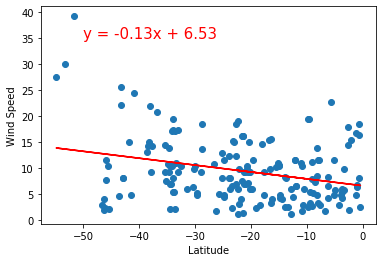

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))